# All Data - NLP EDA - NER on Company Names

This file doesn't run the NER, but does the plotting only

In [169]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
from stattotex import *

In [170]:
# Set output folder
output_folder = '../../../Output/All Data EDA/NLP EDA - NER on Company Names/'

In [171]:
# Load dataframe
# '../../../Data/Company_Mentions/Company_Mentions.parquet'
df = pd.read_parquet('../../../Data/Company_Mentions/Company_Mentions.parquet')
print(df.columns)
print(df)
# Collapse to sum of count by ticker by fixed_quarter_date
df = df[['ticker', 'fixed_quarter_date', 'count']].groupby(['ticker', 'fixed_quarter_date']).sum().reset_index().rename(columns={'count': 'company_mentions'})
df

Index(['ticker', 'fixed_quarter_date', 'company_mentioned', 'count'], dtype='object')
   ticker fixed_quarter_date                           company_mentioned  \
0     LPX         2013-07-01                                         OSB   
1     LPX         2013-07-01                                          LP   
2     LPX         2013-07-01                         D.A. DAVIDSON & CO.   
3     LPX         2013-07-01  THE BUCKINGHAM RESEARCH GROUP INCORPORATED   
4     LPX         2013-07-01                             ENGINEERED WOOD   
..    ...                ...                                         ...   
9     WTI         2016-07-01          THE INTERIOR BOARD OF LAND APPEALS   
10    WTI         2016-07-01                                        BSAE   
11    WTI         2016-07-01                                       JWEST   
12    WTI         2016-07-01                          LADENBURG THALMANN   
13    WTI         2016-07-01                                    MAHOGANY   

 

,ticker,fixed_quarter_date,company_mentions
0,AAPL,2014-10-01,122
1,AAPL,2015-01-01,87
2,AAPL,2015-04-01,83
3,AAPL,2015-07-01,83
4,AAPL,2015-10-01,111
...,...,...,...
5504,ZTS,2015-10-01,45
5505,ZTS,2016-01-01,107
5506,ZTS,2016-04-01,90
5507,ZTS,2016-07-01,75


In [172]:
# Limit to items in the finalized dataset
# list of files in '../../../Data/All_Data/All_Data_with_NLP_Features'
import os
file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_with_NLP_Features') if f.endswith('.parquet')]
# read in all parquet files
all_data_with_nlp_features_ticker_ecd = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f, columns = ['ticker', 'fixed_quarter_date']) for f in file_list])
# Inner join with df
# Convert fixed_quarter_date to datetime in both dataframes
df['fixed_quarter_date'] = pd.to_datetime(df['fixed_quarter_date'])
all_data_with_nlp_features_ticker_ecd['fixed_quarter_date'] = pd.to_datetime(all_data_with_nlp_features_ticker_ecd['fixed_quarter_date'])
df = df.merge(all_data_with_nlp_features_ticker_ecd, on = ['ticker', 'fixed_quarter_date'], how = 'left')
df

,ticker,fixed_quarter_date,company_mentions
0,AAPL,2014-10-01,122
1,AAPL,2015-01-01,87
2,AAPL,2015-04-01,83
3,AAPL,2015-07-01,83
4,AAPL,2015-10-01,111
...,...,...,...
5504,ZTS,2015-10-01,45
5505,ZTS,2016-01-01,107
5506,ZTS,2016-04-01,90
5507,ZTS,2016-07-01,75


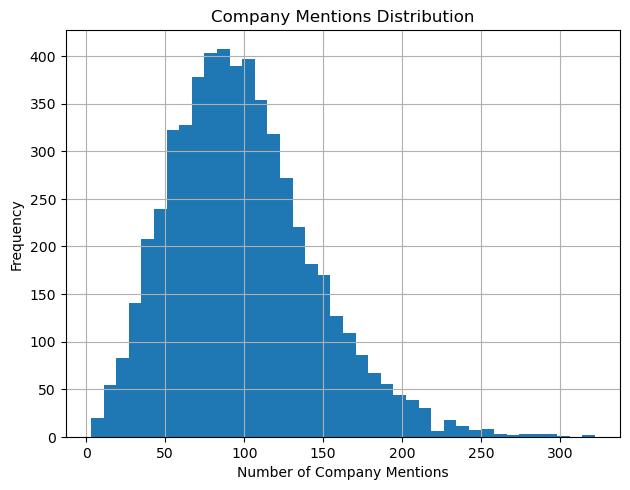

Average number of company mentions: 98.62788164821201


In [173]:
# Plot the distribution of company mentions
#plt.figure(figsize=(8, 5))
plt.hist(df['company_mentions'], bins = 40)
plt.xlabel('Number of Company Mentions')
plt.ylabel('Frequency')
plt.grid(True)
# tight layout
plt.tight_layout()
# Output version with no title
plt.savefig(output_folder + 'Company Mentions Distribution No Title.png')
plt.title('Company Mentions Distribution')
plt.show()

print('Average number of company mentions:', df['company_mentions'].mean())

stattotex(round(df['company_mentions'].mean(), 2), 'avgCompanyMentions', output_folder + 'Company Mentions Average.tex')

In [174]:
# Version excluding self-mentions

# Load in '../../../Data/Company_Mentions/Company_Mentions_With_Ticker.xlsx'
cm_with_ticker = pd.read_excel('../../../Data/Company_Mentions/Company_Mentions_With_Ticker.xlsx')

# Drop if ticker == matched_ticker
cm_with_ticker = cm_with_ticker[cm_with_ticker['ticker'] != cm_with_ticker['matched_ticker']]

cm_with_ticker

,ticker,fixed_quarter_date,company_mentioned,count,matched_ticker,Corporation_clean
0,LPX,2016-04-01,MOODY'S,1,MCO,MOODY'S
1,LYV,2015-07-01,APPLE,1,AAPL,APPLE
2,LYV,2016-01-01,APPLE,1,AAPL,APPLE
3,LYV,2016-04-01,APPLE,1,AAPL,APPLE
4,LYV,2016-07-01,CISCO,3,CSCO,CISCO
...,...,...,...,...,...,...
3330,HOV,2015-10-01,MERITAGE HOMES,1,MTH,MERITAGE HOMES
3331,HOV,2015-10-01,CONSOLIDATED,1,CNSL,CONSOLIDATED
3332,KODK,2015-10-01,AMAZON,1,AMZN,AMAZON
3333,KODK,2016-04-01,ENTERPRISE,1,EPD,ENTERPRISE


In [175]:
# Sum up by ticker and fixed_quarter_date
no_self_mentions_mentions = cm_with_ticker[['ticker', 'fixed_quarter_date', 'count']].groupby(['ticker', 'fixed_quarter_date']).sum().reset_index().rename(columns={'count': 'company_mentions'})

# also do distinct companies mentioned
distinct_no_self_cos_mentioned = cm_with_ticker[['ticker', 'fixed_quarter_date', 'matched_ticker']].groupby(['ticker', 'fixed_quarter_date']).nunique()['matched_ticker']
# merge with no_self_mentions_mentions
no_self_mentions_mentions = no_self_mentions_mentions.merge(distinct_no_self_cos_mentioned, on = ['ticker', 'fixed_quarter_date']).rename(columns={'matched_ticker': 'distinct_companies_mentioned'})

# convert fixed_quarter_date to string
no_self_mentions_mentions['fixed_quarter_date'] = no_self_mentions_mentions['fixed_quarter_date'].astype(str)

no_self_mentions_mentions

,ticker,fixed_quarter_date,company_mentions,distinct_companies_mentioned
0,AAPL,2014-10-01,2,1
1,AAPL,2016-01-01,7,4
2,AAPL,2016-04-01,5,2
3,AAPL,2016-10-01,4,1
4,ABBV,2015-01-01,1,1
...,...,...,...,...
1879,YUM,2015-07-01,2,1
1880,ZBRA,2016-01-01,17,3
1881,ZBRA,2016-04-01,24,3
1882,ZBRA,2016-07-01,5,2


In [176]:
# Reload all tickers and fqd in data
all_tickers_fqd = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f, columns = ['ticker', 'fixed_quarter_date']) for f in file_list])

# Convert fixed_quarter_date to string
all_tickers_fqd['fixed_quarter_date'] = all_tickers_fqd['fixed_quarter_date'].astype(str)

# Join with no_self_mentions_mentions
all_tickers_fqd = pd.merge(all_tickers_fqd, no_self_mentions_mentions, on = ['ticker', 'fixed_quarter_date'], how = 'left')

# Fill NaN with 0
all_tickers_fqd['company_mentions'] = all_tickers_fqd['company_mentions'].fillna(0)
all_tickers_fqd['distinct_companies_mentioned'] = all_tickers_fqd['distinct_companies_mentioned'].fillna(0)

all_tickers_fqd

,ticker,fixed_quarter_date,company_mentions,distinct_companies_mentioned
0,AAPL,2014-10-01,2.0,1.0
1,AAPL,2015-01-01,0.0,0.0
2,AAPL,2015-04-01,0.0,0.0
3,AAPL,2015-07-01,0.0,0.0
4,AAPL,2015-10-01,0.0,0.0
...,...,...,...,...
5504,MHO,2013-10-01,0.0,0.0
5505,MHO,2014-01-01,0.0,0.0
5506,MHO,2014-04-01,0.0,0.0
5507,MHO,2014-07-01,0.0,0.0


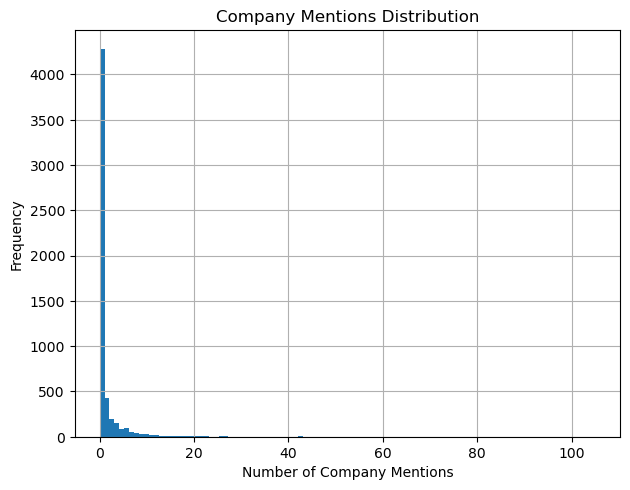

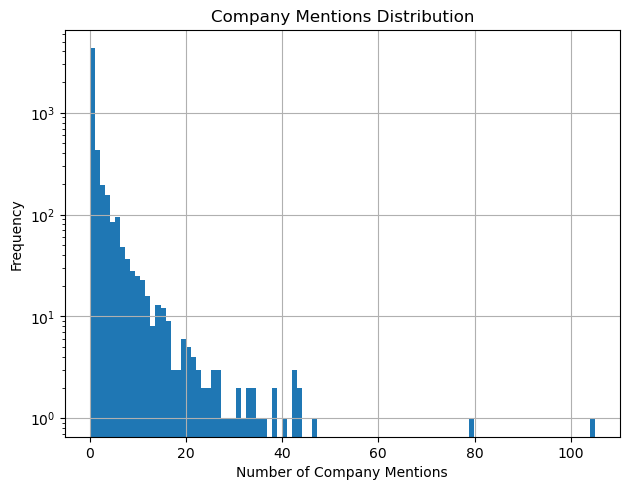

In [177]:
# Plot the distribution of company mentions
#plt.figure(figsize=(8, 5))
#no_zeroes = all_tickers_fqd[all_tickers_fqd['company_mentions'] > 0]
plt.hist(all_tickers_fqd['company_mentions'], bins = 100)
plt.xlabel('Number of Company Mentions')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.grid(True)
# tight layout
plt.tight_layout()
# Output version with no title
plt.savefig(output_folder + 'Company Mentions Distribution No Self Mentions No Title.png')
plt.title('Company Mentions Distribution')
plt.show()

# Log scale version
plt.hist(all_tickers_fqd['company_mentions'], bins = 100)
plt.xlabel('Number of Company Mentions')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
# tight layout
plt.tight_layout()
# Output version with no title
plt.savefig(output_folder + 'Company Mentions Distribution No Self Mentions No Title Log Scale.png')
plt.title('Company Mentions Distribution')
plt.show()

In [178]:
print('Average number of company mentions:', all_tickers_fqd['company_mentions'].mean())

stattotex(round(all_tickers_fqd['company_mentions'].mean(), 2), 'avgCompanyMentNoSelf', output_folder + 'Company Mentions Average.tex')

# Count of calls with other company mentions
calls_with_mentions = all_tickers_fqd[all_tickers_fqd['company_mentions'] > 0].shape[0]
#calls_with_mentions = "{:,}"
# add comma
cwm_str = "{:,}".format(calls_with_mentions)
stattotex(cwm_str, 'noCallsWithNonSelfMentions', output_folder + 'Calls with Non Self Mentions.tex')
print('number of calls with non-self mentions:', cwm_str)
# Share of calls with other company mentions
share_calls_with_mentions = str(round(calls_with_mentions / all_tickers_fqd.shape[0] * 100, 2)) + '\%'
stattotex(share_calls_with_mentions, 'shareCallsWithNonSelfMentions', output_folder + 'Calls with Non Self Mentions.tex')
print('share of calls with non-self mentions:', share_calls_with_mentions)

# average number of distinct companies mentioned
print('average number of distinct non-self companies mentioned:', all_tickers_fqd['distinct_companies_mentioned'].mean())
stattotex(round(all_tickers_fqd['distinct_companies_mentioned'].mean(), 2), 'avgDistinctNonSelfCompaniesMentioned', output_folder + 'Company Mentions Average.tex')

Average number of company mentions: 1.3744781267017607
number of calls with non-self mentions: 1,884
share of calls with non-self mentions: 34.2\%
average number of distinct non-self companies mentioned: 0.49918315483753856
